Project: Real Time Diabetic Retinopathy detection using CNN

Dataset: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered



Author: Samiul Bari

**Importing All Necessary Modules and Packages**

In [ ]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered") #f71ee8768a1e1d2d75715e68b2b7fd41

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  yahiabouslimi


Your Kaggle Key:

  ································


100%|██████████| 427M/427M [00:04<00:00, 100MB/s]  


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [4]:
#Locate the file in Personal Machine
path = '/kaggle/working/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images'

In [5]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')

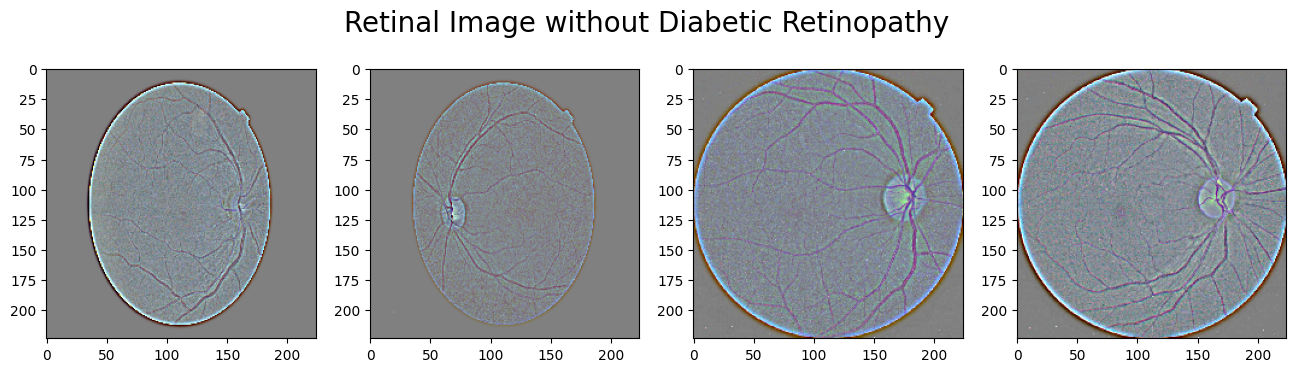

In [6]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()

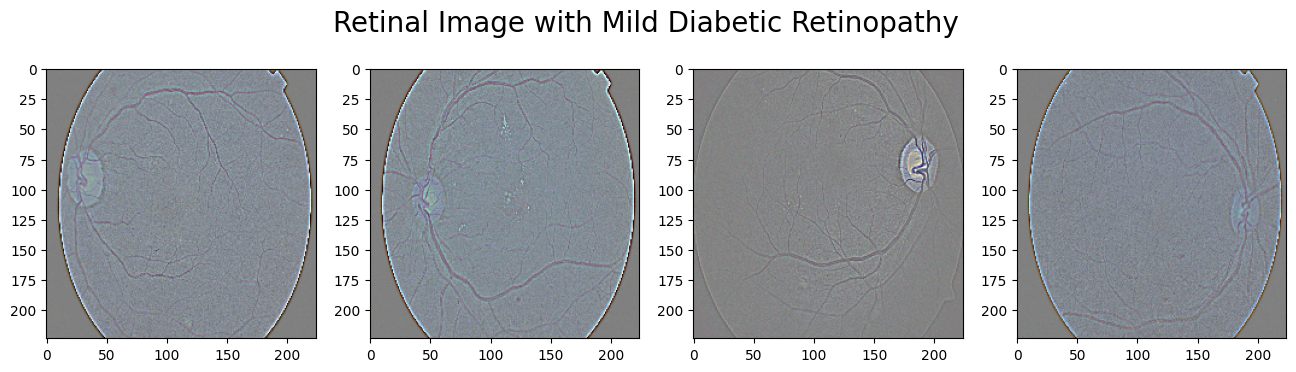

In [7]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Mild/'+ Mild_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Mild Diabetic Retinopathy",fontsize=20)
plt.show()

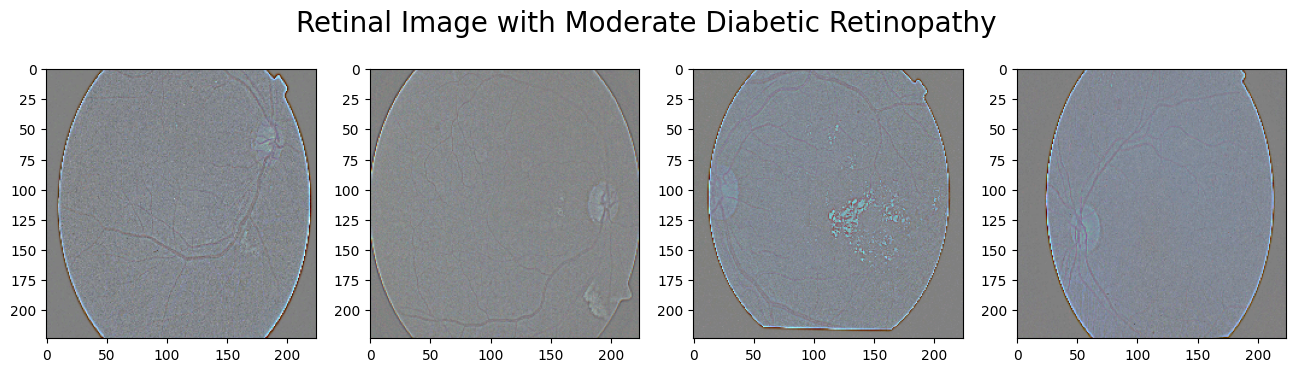

In [8]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Moderate/'+ Moderate_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Moderate Diabetic Retinopathy",fontsize=20)
plt.show()

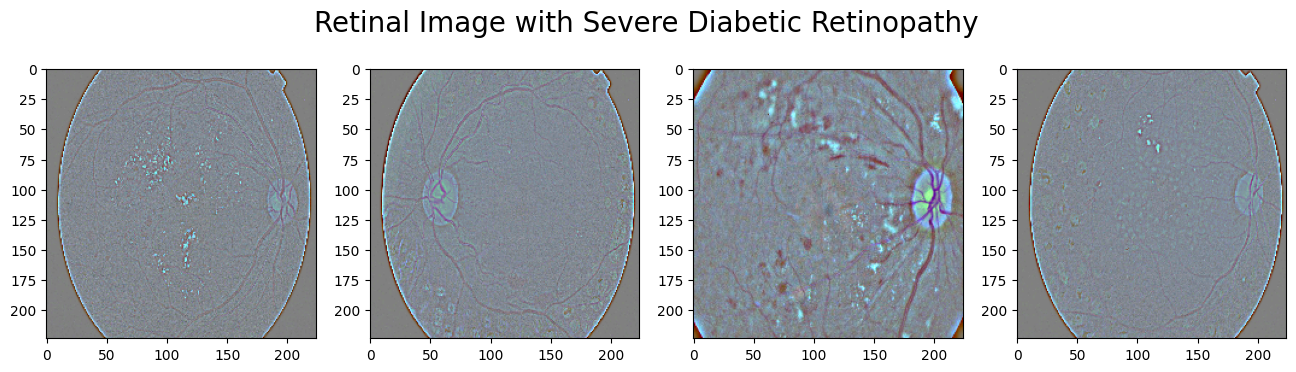

In [9]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Severe/'+ Severe_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Severe Diabetic Retinopathy",fontsize=20)
plt.show()

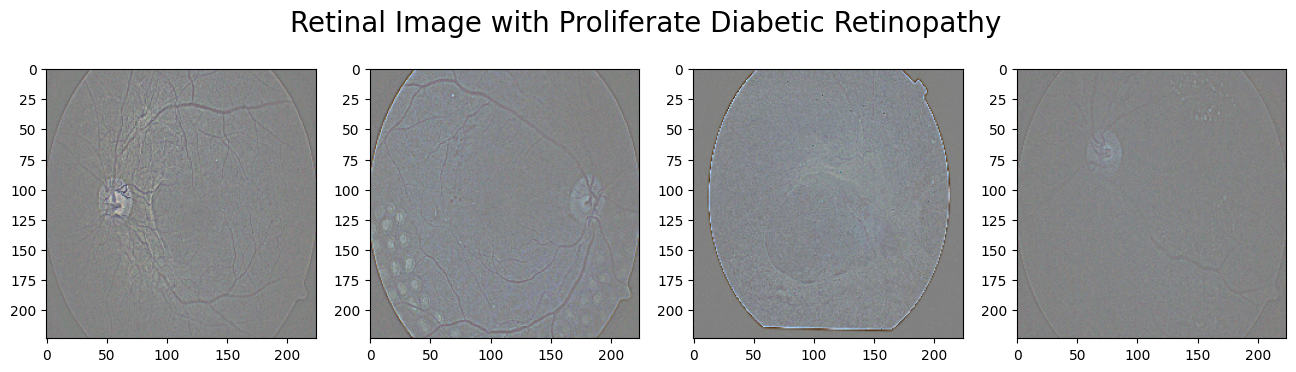

In [10]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Proliferate_DR/'+ Proliferate_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Proliferate Diabetic Retinopathy",fontsize=20)
plt.show()

In [11]:
Classes = {'No_DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferate_DR':4}

**Data PreProcessing**

In [12]:
#Normalizing pixel values
X = []
y = []
for i in Classes:
    folder_path ='/kaggle/working/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [13]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((3662, 224, 224, 3), (3662,))

**Dataset Analysis**

In [14]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [15]:
from imblearn.over_sampling import SMOTE
#Using SMOTE to oversample the minority class(Edema) to avoid class imbalance
sm = SMOTE(random_state = 2)
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X.reshape(X.shape[0], -1), y.ravel())

In [16]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [17]:
X = X.reshape(X.shape[0], 224, 224, 3)

In [18]:
# Used to clean up the memory to get rid of gurbage data
import gc
gc.collect()

27786

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)
#used stratify to balance the number of examples for each class

In [20]:
X_train.shape

(7220, 224, 224, 3)

In [21]:
X_test.shape

(1805, 224, 224, 3)

In [22]:
X_train = X_train.reshape( (-1,224,224,3))
X_test = X_test.reshape((-1,224,224,3))

**Import the Model Architecture (VGG 16)**

In [23]:
from tensorflow.keras.applications.densenet import DenseNet2

In [24]:
vgg = DenseNet121(input_shape=(224,224,3),weights='imagenet',include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [25]:
vgg.trainable = True

set_trainable = False

for layer in vgg.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [26]:
for layer in vgg.layers[:]:
  if ('bn' in layer.name):
    trainable = False

In [27]:
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [28]:
x = Flatten()(vgg.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(5,activation='softmax')(x)

In [29]:
from tensorflow.keras.models import Model

In [30]:
model = Model(inputs=vgg.input, outputs=prediction)

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [32]:
gc.collect()

1237

In [33]:
X=[]
y=[]

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [36]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.005, patience=10, verbose=1, mode='auto')

#Model Check Point

mc = ModelCheckpoint(monitor='val_accuracy', filepath = '/kaggle/working/diabetic-retinopathy-224x224-gaussian-filtered/DR-model.h5', verbose=1, save_best_only = True, mode='auto')

cd = [es,mc]

In [37]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = adam,
              metrics=['accuracy']
)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=40,
          callbacks=cd,
          batch_size = 32,
          shuffle=True)

Epoch 1/40
226/226 [==============================] - ETA: 0s - loss: 1.2219 - accuracy: 0.5151
Epoch 1: val_accuracy improved from -inf to 0.65762, saving model to /kaggle/working/diabetic-retinopathy-224x224-gaussian-filtered/DR-model.h5
226/226 [==============================] - 612s 3s/step - loss: 1.2219 - accuracy: 0.5151 - val_loss: 0.8926 - val_accuracy: 0.6576
Epoch 2/40
226/226 [==============================] - ETA: 0s - loss: 0.8548 - accuracy: 0.6616
Epoch 2: val_accuracy improved from 0.65762 to 0.74183, saving model to /kaggle/working/diabetic-retinopathy-224x224-gaussian-filtered/DR-model.h5
226/226 [==============================] - 594s 3s/step - loss: 0.8548 - accuracy: 0.6616 - val_loss: 0.6795 - val_accuracy: 0.7418
Epoch 3/40
226/226 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.7395
Epoch 3: val_accuracy improved from 0.74183 to 0.79391, saving model to /kaggle/working/diabetic-retinopathy-224x224-gaussian-filtered/DR-model.h5
226/226 [=

In [ ]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [ ]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

     # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
plot_metrics(history)

In [ ]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

In [ ]:
y_predicted_tf = model.predict(X_test)

In [ ]:
y_predicted_tf

In [ ]:
y_test

In [ ]:
y_predicted =[]
for i in range(1805):
    max_val = y_predicted_tf[i][0]
    classify = 0
    for j in range(5):
        if max_val<y_predicted_tf[i][j]:
            max_val = y_predicted_tf[i][j]
            classify = j
    y_predicted.append(classify)

In [ ]:
y_predicted

In [ ]:
len(y_predicted)

In [ ]:
len(y_test)

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
f1_score(y_test, y_predicted, average='micro')

In [ ]:
recall_score(y_test, y_predicted, average='micro')

In [ ]:
 precision_score(y_test, y_predicted, average='micro')

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

In [ ]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10); ax.yaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10);